<a href="https://colab.research.google.com/github/SarraBenHamad/HousePricingPrediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install kaggle

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarrabenhamad","key":"bf5964dd44bc3d1819ab16cdfb27a968"}'}

In [15]:
#create a folder move the file in it and change les droits
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:

!kaggle datasets download -d shree1992/housedata


Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 121MB/s]


In [17]:
!unzip housedata.zip -d /content/dataset


Archive:  housedata.zip
  inflating: /content/dataset/data.csv  
  inflating: /content/dataset/data.dat  
  inflating: /content/dataset/output.csv  


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [21]:
df = pd.read_csv('/content/dataset/data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [24]:
categorical_list=df.astype('object')

for col in categorical_list :
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           4600 non-null   int64
 1   price          4600 non-null   int64
 2   bedrooms       4600 non-null   int64
 3   bathrooms      4600 non-null   int64
 4   sqft_living    4600 non-null   int64
 5   sqft_lot       4600 non-null   int64
 6   floors         4600 non-null   int64
 7   waterfront     4600 non-null   int64
 8   view           4600 non-null   int64
 9   condition      4600 non-null   int64
 10  sqft_above     4600 non-null   int64
 11  sqft_basement  4600 non-null   int64
 12  yr_built       4600 non-null   int64
 13  yr_renovated   4600 non-null   int64
 14  street         4600 non-null   int64
 15  city           4600 non-null   int64
 16  statezip       4600 non-null   int64
 17  country        4600 non-null   int64
dtypes: int64(18)
memory usage: 647.0 KB


In [26]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column].str.replace('-', 'NaN'), errors='coerce')

In [27]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


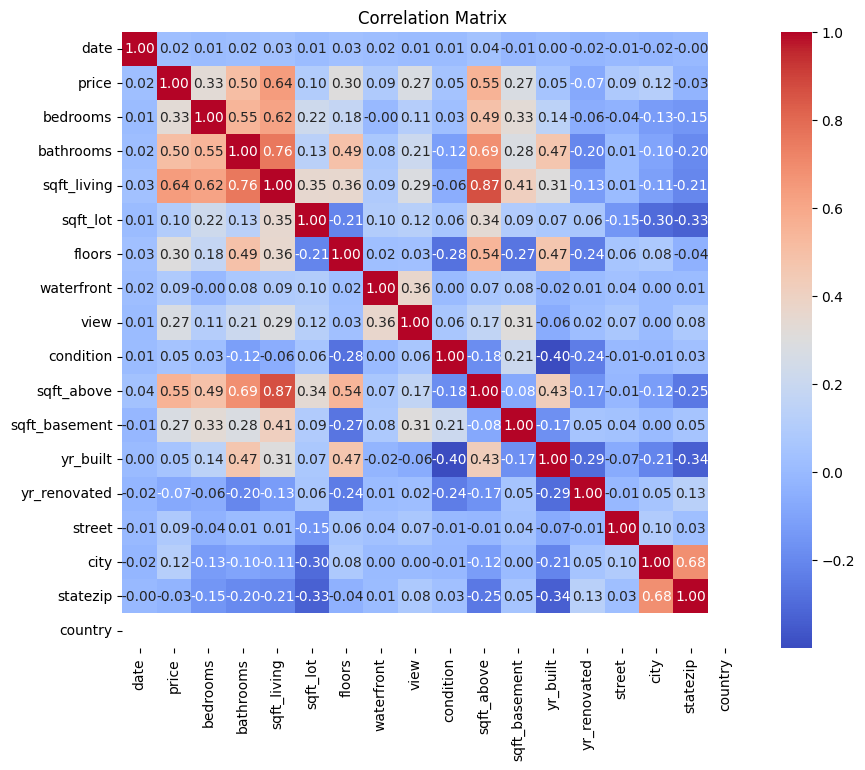

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
df.drop(columns=['statezip','street','yr_renovated','city','yr_built','condition','waterfront','sqft_lot','date',],axis=1,inplace=True)


In [31]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,country
0,402,3,4,93,1,0,96,0,0
1,1719,5,8,406,2,4,373,29,0
2,487,3,6,180,0,0,182,0,0
3,706,3,7,191,0,0,52,109,0
4,998,4,8,181,0,0,70,85,0


In [32]:
x = df[['bedrooms', 'bathrooms', 'sqft_living','floors','view','sqft_above','sqft_basement','country']]

y=df[['price']]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [34]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 129022.13672158582
R-squared: 0.3947797635798269


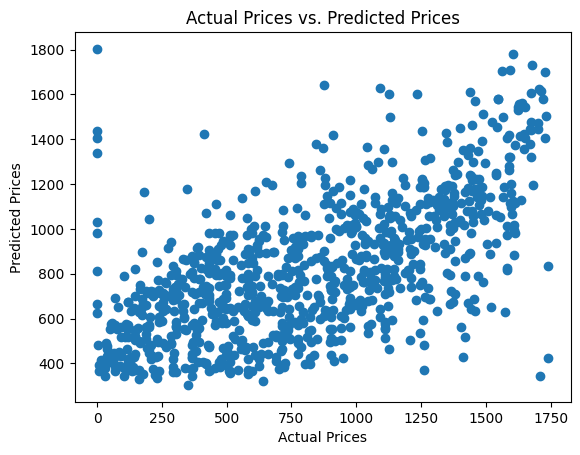

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()